In [356]:
import pandas
import seaborn
import numpy as np

pandas.options.display.max_columns = 11
pandas.options.display.max_rows = 30

game_sales_data = pandas.read_csv("vgsales.csv")

game_sales_data.dropna(inplace=True)
game_sales_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


No. | Question
:-:|:-
1 | What games have been popular recently?
2 | Which companies are more popular?
3 | What genres are preferred in North America?
4 | What similarities are there between the top selling games?
5 | Which country has the most consumers?
6 | Which platform is the most popular?
7 | What series is most popular?
8 | Which genres are more popular?
9 | How did sequels of popular games do in terms of sales?
10 | How many indie games are top sellers compared to AAA games?


In [357]:
# Q1: What games have been popular recently?
# Recently will be defined as in the past 10 years, popularity will be defined by global sales, and we will use the 
# top ten games.
recent_games = game_sales_data[game_sales_data["Year"] >= 2012]
game_names = recent_games["Name"].head(20)
lis_names = []
for name in game_names:
    if name not in lis_names:
        lis_names.append(name)
    if len(lis_names) == 10:
        break
for item in lis_names:
    print(item)

Grand Theft Auto V
Pokemon X/Pokemon Y
Call of Duty: Black Ops 3
Call of Duty: Black Ops II
Pokemon Omega Ruby/Pokemon Alpha Sapphire
Call of Duty: Ghosts
New Super Mario Bros. 2
Halo 4
Minecraft
Animal Crossing: New Leaf


In [358]:
# Q2: Which companies are more popular?
# I will use the total sales of a company globally to determine popularity and only the top 10 will be shown.
dict_loc = {}
sorted_loc = {}
list_of_companies = game_sales_data["Publisher"].unique()
for company in list_of_companies:
    dict_loc[company] = game_sales_data["Global_Sales"][game_sales_data["Publisher"] == company].sum()
keys = sorted(dict_loc, key=dict_loc.get, reverse=True)
for k in keys:
    sorted_loc[k] = dict_loc[k]
lis = list(sorted_loc)[0:10]
for item in lis:
    print(item,":",sorted_loc[item])

Nintendo : 1784.4300000000003
Electronic Arts : 1093.39
Activision : 721.41
Sony Computer Entertainment : 607.2800000000001
Ubisoft : 473.53999999999996
Take-Two Interactive : 399.3
THQ : 340.44
Konami Digital Entertainment : 278.56
Sega : 270.7
Namco Bandai Games : 253.65


In [359]:
# Q3: What genres are preferred in North America?
# We will only look at U.S. sales to find the preferred genres.
dict_log = {}
sorted_log = {}
list_of_genres = game_sales_data["Genre"].unique()
for genre in list_of_genres:
    dict_log[genre] = game_sales_data["NA_Sales"][game_sales_data["Genre"] == genre].sum()
keys = sorted(dict_log, key=dict_log.get, reverse=True)
for k in keys:
    sorted_log[k] = dict_log[k]
for genre in sorted_log:
    print(genre,":",sorted_log[genre])

Action : 861.7700000000001
Sports : 670.09
Shooter : 575.16
Platform : 445.99
Misc : 396.92
Racing : 356.93
Role-Playing : 326.49999999999994
Fighting : 220.74
Simulation : 181.78
Puzzle : 122.01
Adventure : 101.93
Strategy : 67.83


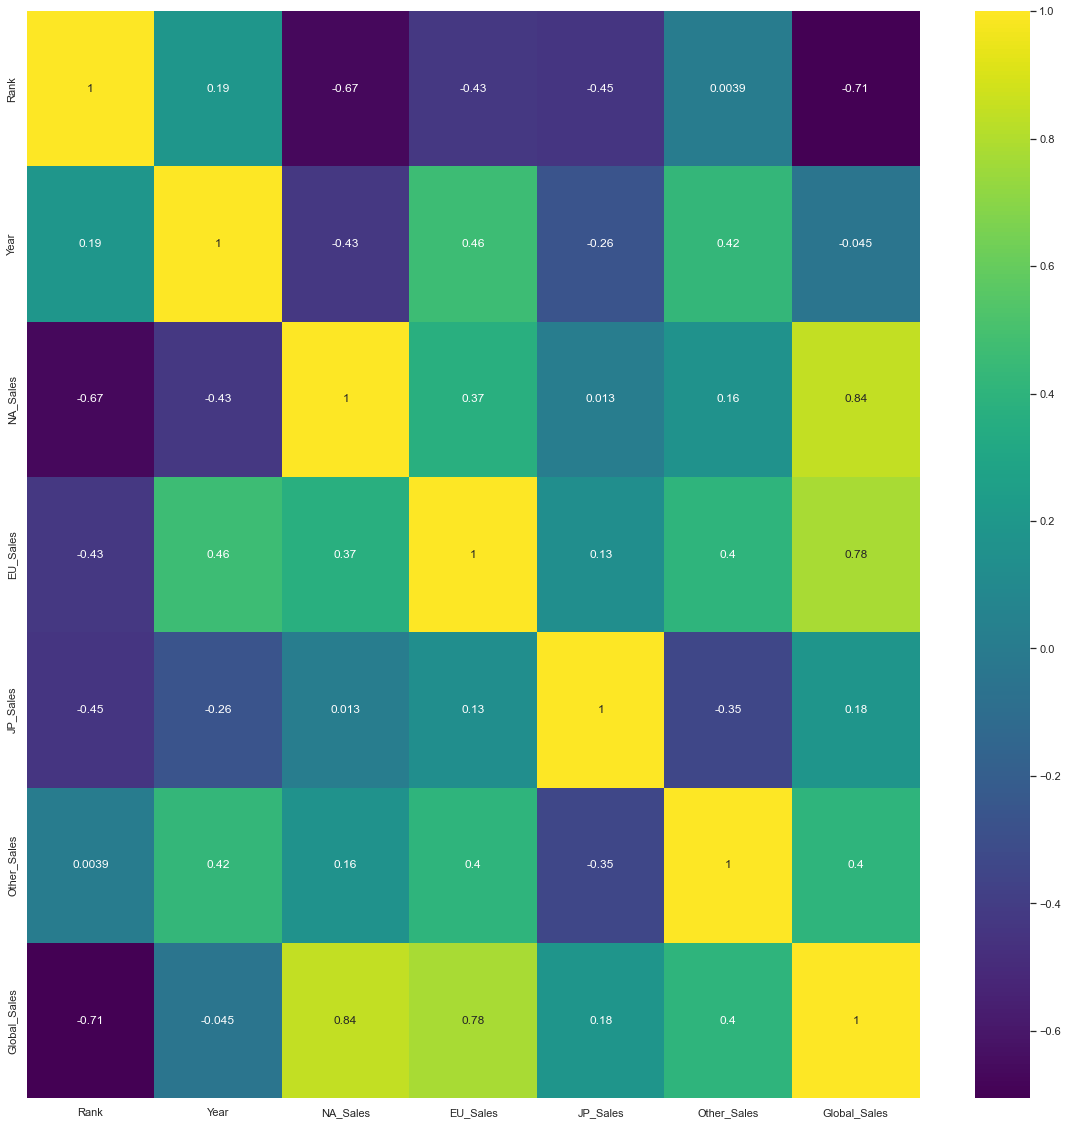

In [360]:
# Q4: What similarites are there between the top selling games?
# For this question, I will use the top twenty games of the dataset and make a correlation heatmap
# as well as categorical bar plots.
seaborn.set(rc={'figure.figsize':(20,20)})
seaborn.heatmap(game_sales_data.head(20).corr(), annot = True, cmap = 'viridis');

In [361]:
# Here we can see that most of the top-selling games were released around the same time.
game_sales_data.head(20)
# Roughly from 2006 to 2010
# Many of the top selling games were made by Nintendo, a company which aims for games that can be enjoyed by a 
# wide audience. Many of those games are made for the Wii console system or are under the Mario Bros. franchise. 
# We can also see that consumers in North America are the main contributing factor to the sales.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


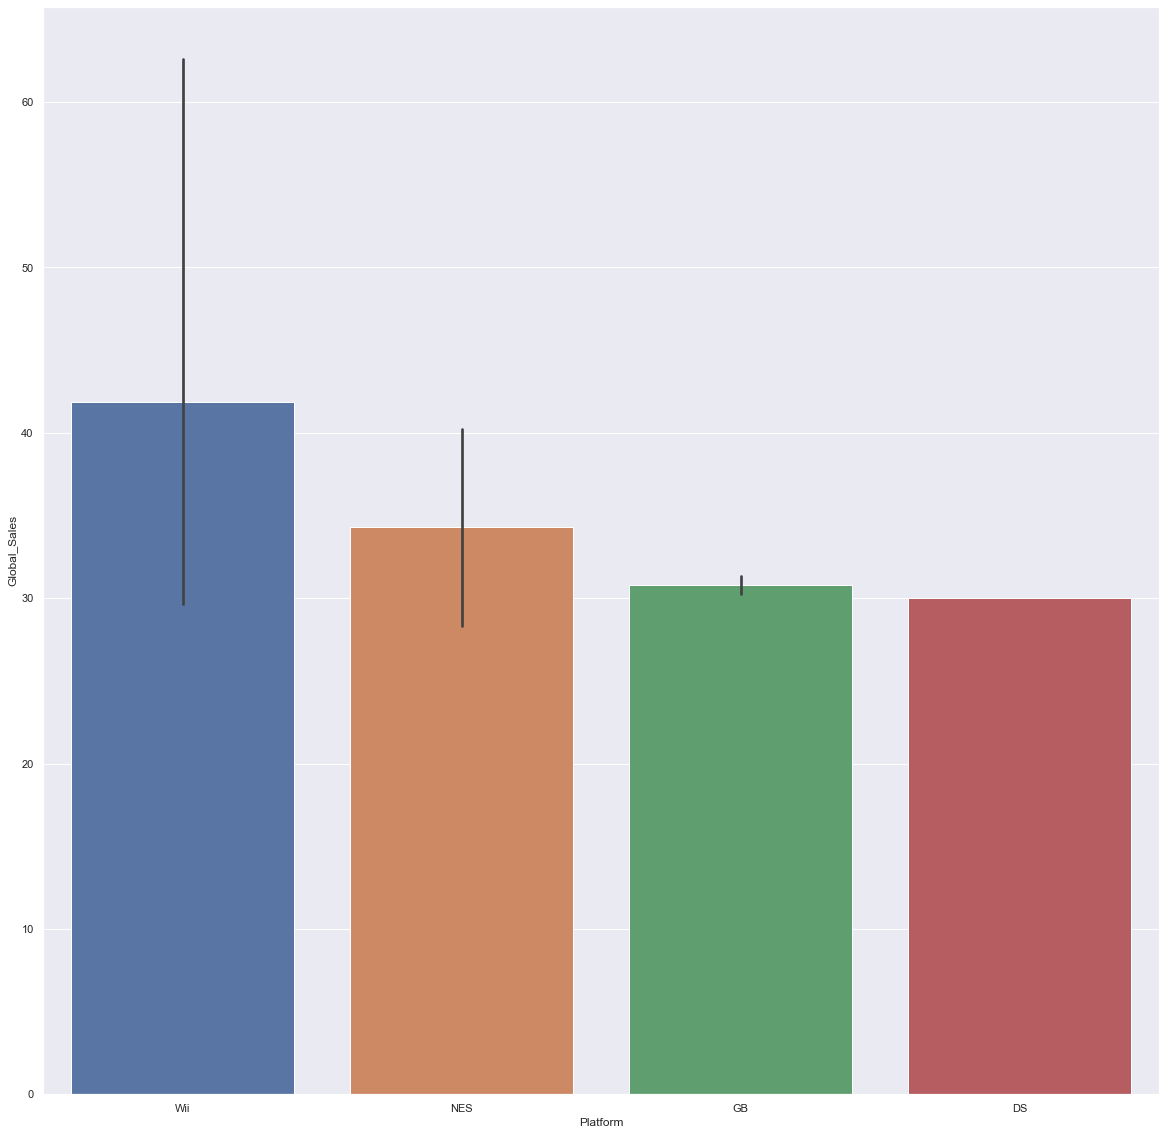

In [362]:
seaborn.barplot(x = game_sales_data['Platform'].head(10), y = game_sales_data["Global_Sales"]);
# We can confirm that most sales were for games released on the Wii.

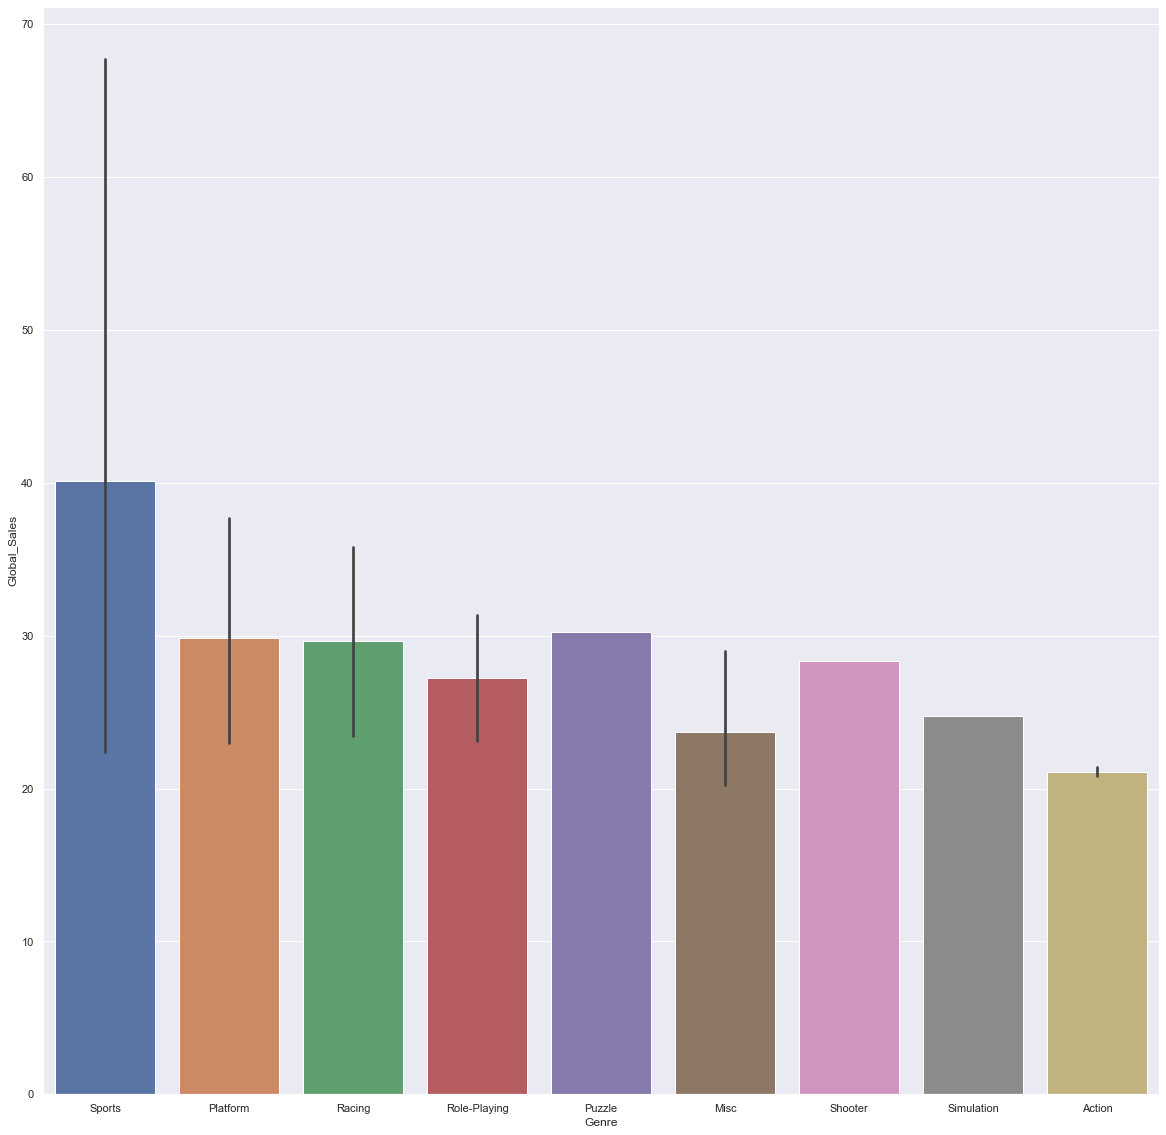

In [363]:
seaborn.barplot(x = game_sales_data['Genre'].head(20), y = game_sales_data["Global_Sales"]);
# Here we can see that Sports games were more popular than the other genres.

In [364]:
# Q5: Which country has the most consumers?
# In Q4, we saw the correlation of the top ten selling games where North America had the highest number of sales,
# but in order to check we need to see the entire list of games.
na = game_sales_data["NA_Sales"].sum()
eu = game_sales_data["EU_Sales"].sum()
jp = game_sales_data["JP_Sales"].sum()
ot = game_sales_data["Other_Sales"].sum()
print("NA :",na)
print("EU :",eu)
print("JP :",jp)
print("Other :",ot)
# We can see that North America has indeed purchased more games than the other places.

NA : 4327.650000000001
EU : 2406.69
JP : 1284.2700000000002
Other : 788.9100000000001


In [365]:
# Q6: Which platform is the most popular?
# For this question, we will find the number of sales of a game on a particular platform, thus sales will still be counted 
# if a game was released for multiple platforms.
dict_plat = {}
sorted_plat = {}
list_of_plat = game_sales_data["Platform"].unique()
for plat in list_of_plat:
    dict_plat[plat] = game_sales_data["Global_Sales"][game_sales_data["Platform"] == plat].sum()
keys = sorted(dict_plat, key=dict_plat.get, reverse=True)
for k in keys:
    sorted_plat[k] = dict_plat[k]
for plat in sorted_plat:
    print(plat,":",sorted_plat[plat])

PS2 : 1233.46
X360 : 969.5999999999998
PS3 : 949.35
Wii : 909.81
DS : 818.9100000000001
PS : 727.39
GBA : 305.61999999999995
PSP : 291.71
PS4 : 278.1
PC : 254.70000000000005
GB : 254.41999999999996
XB : 252.09000000000003
NES : 251.07
3DS : 246.27
N64 : 218.20999999999998
SNES : 200.05
GC : 197.14000000000004
XOne : 141.06
2600 : 86.57
WiiU : 81.86000000000001
PSV : 61.60000000000001
SAT : 33.59
GEN : 28.36
DC : 15.969999999999999
SCD : 1.8700000000000003
NG : 1.4400000000000002
WS : 1.42
TG16 : 0.16
3DO : 0.1
GG : 0.04
PCFX : 0.03


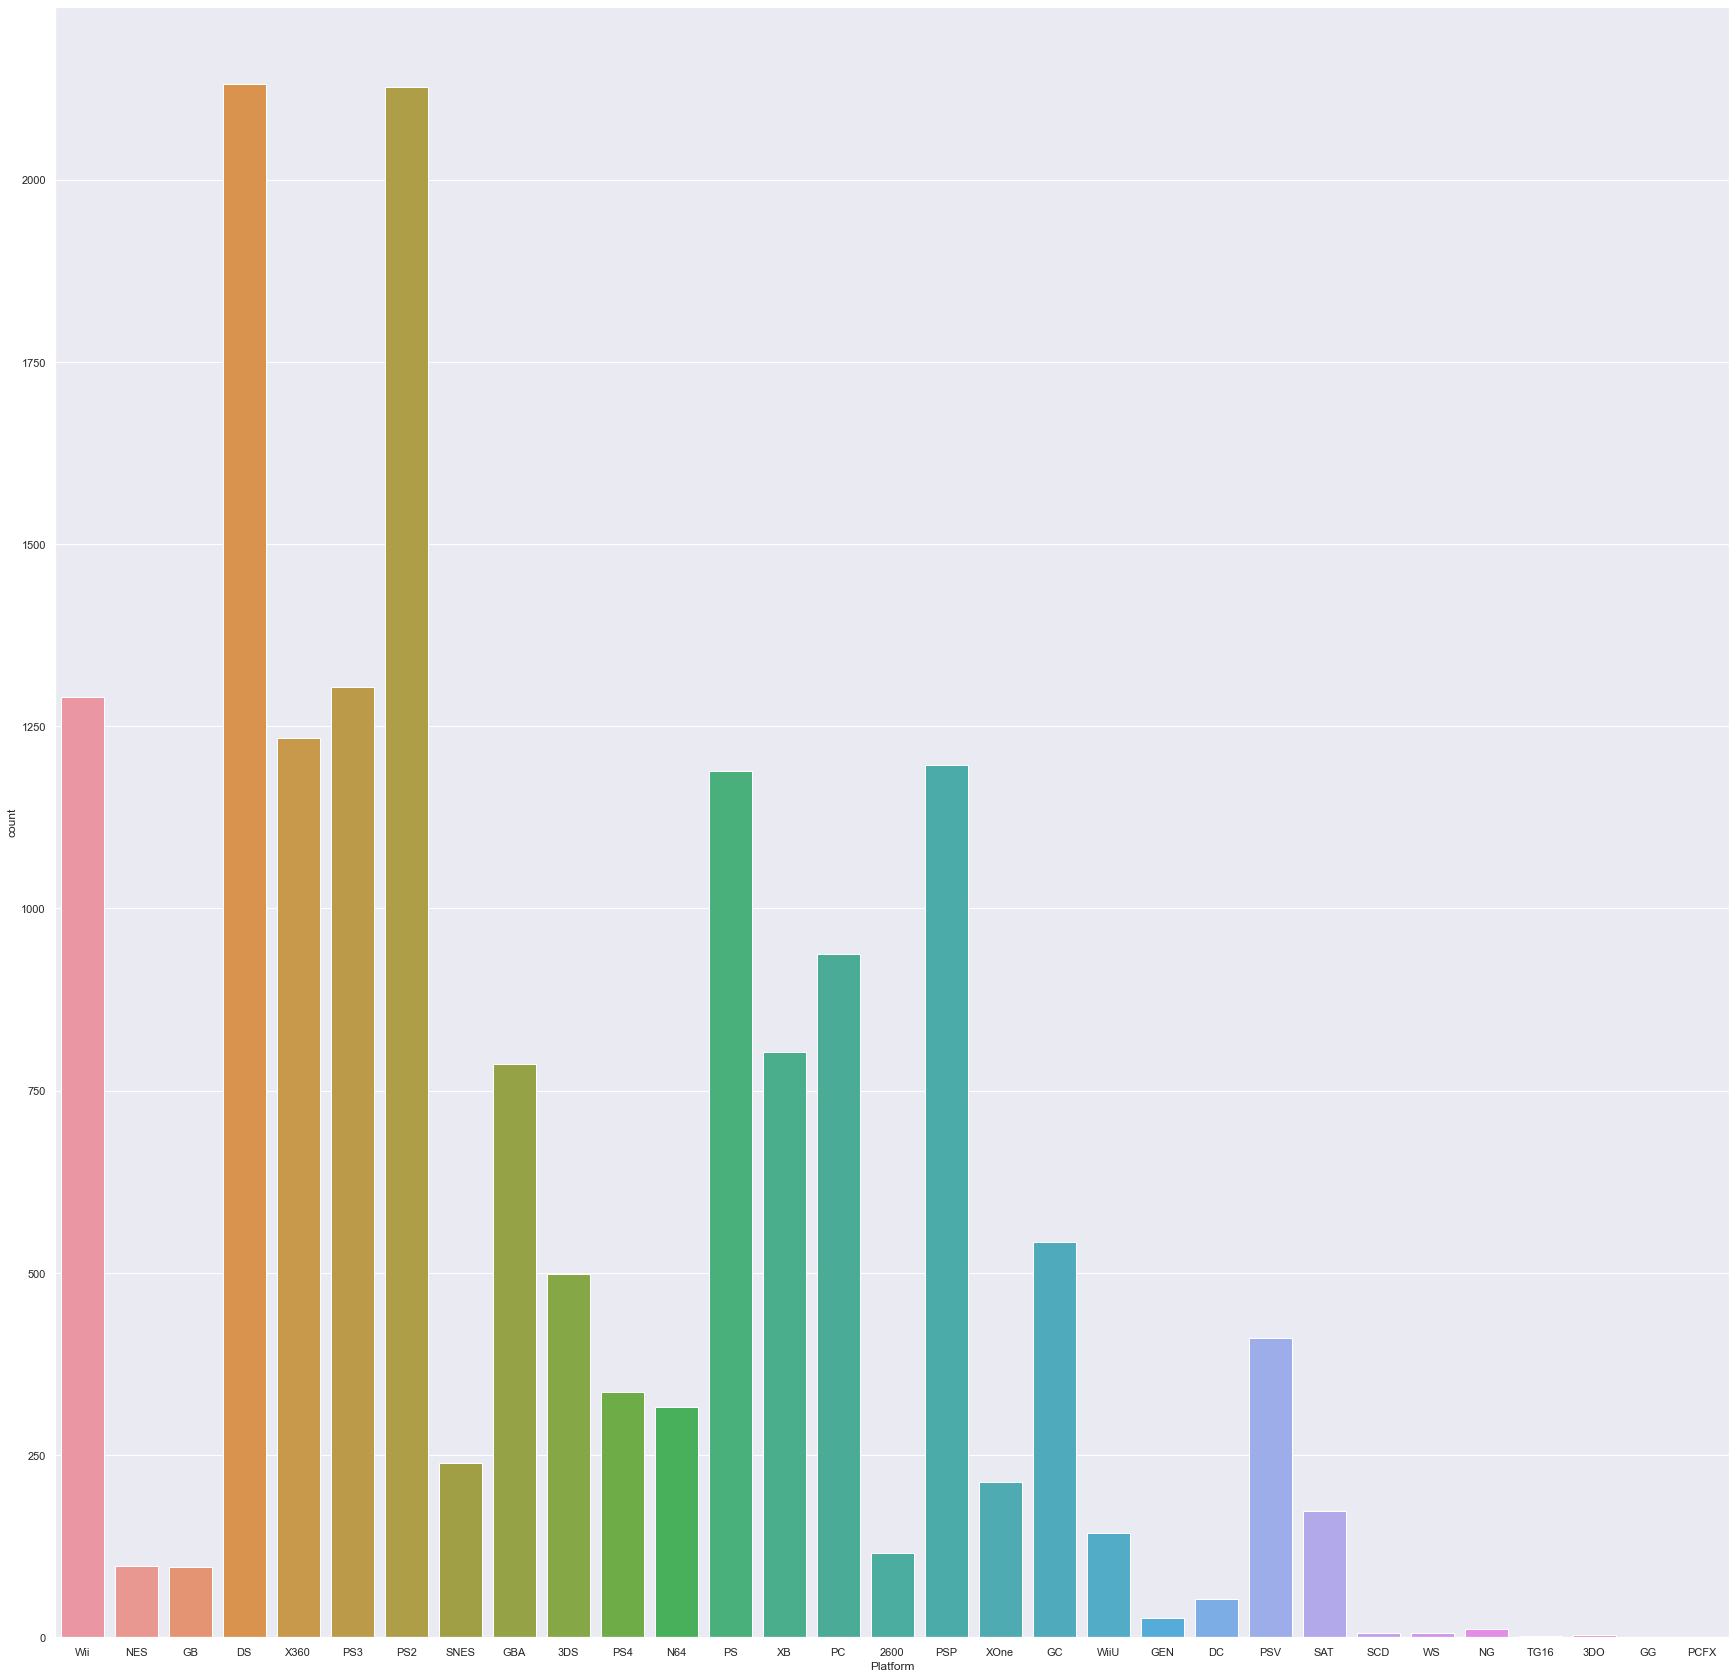

In [366]:
# The Playstation 2 turns out to be the most popular despite all of the top selling Nintendo games. 
# Let's see why.
seaborn.set(rc={'figure.figsize':(30,30)})
seaborn.countplot(x = game_sales_data["Platform"]);

DS : 0.3842843735335524
PS2 : 0.5799059708509638


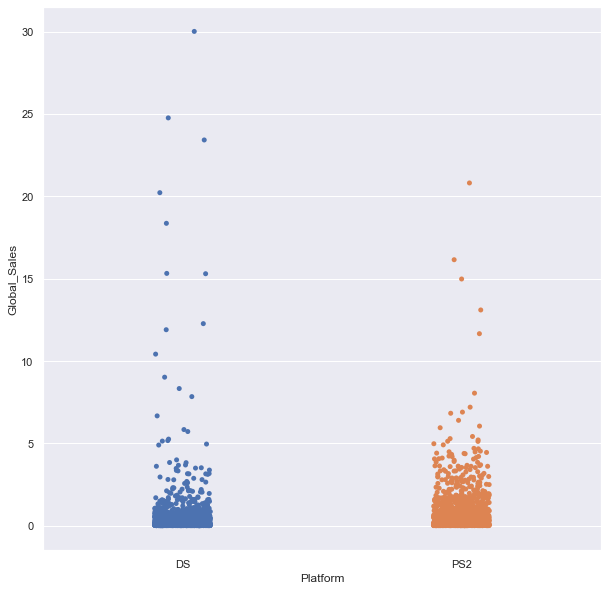

In [367]:
# The DS has a similar catalog size as the PS2, but not as many sales.
seaborn.set(rc={'figure.figsize':(10,10)})
filtered_data = game_sales_data[(game_sales_data['Platform'] == "DS") | (game_sales_data["Platform"] == "PS2")]
print("DS :", filtered_data[filtered_data["Platform"] == "DS"]["Global_Sales"].mean())
print("PS2 :", filtered_data[filtered_data["Platform"] == "PS2"]["Global_Sales"].mean())
seaborn.stripplot(y = filtered_data["Global_Sales"], x = filtered_data["Platform"]);
# The PS2 has slightly higher average global sales than the DS.

In [368]:
# Q7: What series is most popular?
# In order to group together the series, we will look for key words in the game title. To get those keywords, I will
# look for instances where the same words appear often.


In [369]:
# Q8: Which genres are more popular?
# For the purpose of this question, popularity will be defined as the total sales of a genre globally.
dict_log = {}
sorted_log = {}
list_of_genres = game_sales_data["Genre"].unique()
for genre in list_of_genres:
    dict_log[genre] = game_sales_data["Global_Sales"][game_sales_data["Genre"] == genre].sum()
keys = sorted(dict_log, key=dict_log.get, reverse=True)
for k in keys:
    sorted_log[k] = dict_log[k]
for genre in sorted_log:
    print(genre,":",sorted_log[genre])

Action : 1722.84
Sports : 1309.2400000000002
Shooter : 1026.2
Role-Playing : 923.83
Platform : 829.13
Misc : 789.87
Racing : 726.7600000000001
Fighting : 444.04999999999995
Simulation : 389.98
Puzzle : 242.21
Adventure : 234.59
Strategy : 173.27


In [370]:
# Q9: How did sequels of popular games do in terms of sales?
# For this question, I will use a few of the most popular series to determine how sequels perform.
franchise = ["Super Mario", "Call of Duty", "Halo", "Animal Crossing", "Mario Kart", "Pokemon"]
titles = []
l = []
for name in game_sales_data["Name"]:
    for title in franchise:
        if title in name:
            if name in titles:
                break
            else:
                titles.append(name)
titles.sort()
for t in titles:
    print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))


                Name  Global_Sales
435  Animal Crossing          3.15
                                  Name  Global_Sales
4657  Animal Crossing: Amiibo Festival          0.42
                           Name  Global_Sales
226  Animal Crossing: City Folk          4.68
                                     Name  Global_Sales
476  Animal Crossing: Happy Home Designer          2.98
                         Name  Global_Sales
73  Animal Crossing: New Leaf          9.09
                           Name  Global_Sales
41  Animal Crossing: Wild World         12.27
                                 Name  Global_Sales
6098  Battle & Get! Pokemon Typing DS          0.29
                 Name  Global_Sales
841    Call of Duty 2          2.02
12408  Call of Duty 2          0.06
                Name  Global_Sales
550   Call of Duty 3          2.71
1238  Call of Duty 3          1.52
1919  Call of Duty 3          1.07
                                Name  Global_Sales
70    Call of Duty 4: Modern Warfare 

In [371]:
count = 0
for t in titles:
    print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))
    count += 1
    if count == 6:
        break
# The Animal Crossing franchise goes as follows: Animal Crossing, Wild World, City Folk, New Leaf,
# Happy Home Designer, and Amiibo Festival. Using the global sales value, we can see that Wild World
# sold very well compared to the original Animal Crossing, but then City Folk dropped in sales, with
# New Leaf also selling very well. Happy Home Designer and Amiibo Festival are spin-off games, but 
# Amiibo Festival sold very poorly compared to Happy Home Designer.

                Name  Global_Sales
435  Animal Crossing          3.15
                                  Name  Global_Sales
4657  Animal Crossing: Amiibo Festival          0.42
                           Name  Global_Sales
226  Animal Crossing: City Folk          4.68
                                     Name  Global_Sales
476  Animal Crossing: Happy Home Designer          2.98
                         Name  Global_Sales
73  Animal Crossing: New Leaf          9.09
                           Name  Global_Sales
41  Animal Crossing: Wild World         12.27


In [372]:
count = 0
for t in titles:
    count += 1
    if count >= 8:
        print(game_sales_data[game_sales_data["Name"] == t].filter(items=["Name","Global_Sales"]))
    if count == (8+19):
        break

                 Name  Global_Sales
841    Call of Duty 2          2.02
12408  Call of Duty 2          0.06
                Name  Global_Sales
550   Call of Duty 3          2.71
1238  Call of Duty 3          1.52
1919  Call of Duty 3          1.07
                                Name  Global_Sales
70    Call of Duty 4: Modern Warfare          9.32
120   Call of Duty 4: Modern Warfare          6.72
1769  Call of Duty 4: Modern Warfare          1.15
1944  Call of Duty 4: Modern Warfare          1.06
                                      Name  Global_Sales
1071  Call of Duty Black Ops: Declassified          1.69
                                Name  Global_Sales
93    Call of Duty: Advanced Warfare          7.60
193   Call of Duty: Advanced Warfare          5.13
244   Call of Duty: Advanced Warfare          4.45
257   Call of Duty: Advanced Warfare          4.31
4740  Call of Duty: Advanced Warfare          0.41
                         Name  Global_Sales
31    Call of Duty: Black Ops    

We can see by order of release as shown here: https://en.wikipedia.org/wiki/Call_of_Duty#Main_series that the sequels tended to do better except for Black Ops: Declassified,
which was a Playstation Vita game, which failed due to flaws in the game's engine.

In [373]:
# Q10: How many indie games are top sellers compared to AAA games?
# We will use the top 50 games sold for this question.
pandas.options.display.max_rows = 50
game_sales_data.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


We can already see that the top sellers are dominated by big names. So the answer is that Indie Games can't compete with triple A titles. However, when is the first instance of an Indie game? 

In [374]:
# The first instance is actually Minecraft, in 73th place.
game_sales_data[game_sales_data["Name"] == "Minecraft"]
# While it is listed as under Microsoft publication, I will count it as an Indie title because it 
# started as one and was later picked up.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,73,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
168,169,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
297,298,Minecraft,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
643,644,Minecraft,XOne,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
713,715,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
4513,4515,Minecraft,WiiU,2016.0,Misc,Microsoft Game Studios,0.18,0.09,0.14,0.03,0.43


In [375]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [376]:
'''
Create new genre_class and platform_class columns in dataset with unique numbers for each unique genre and platform value
this will allow you to use regression normally with numbers
'''

genres = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter',
 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'] # 11

genre_class = []

platforms = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64',
 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT',
 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'] #30

platform_class = []

for index, row in game_sales_data.iterrows():
    if row['Genre'] == genres[0]: # is referring to "sports":
        genre_class.append(0)
    elif row['Genre'] == genres[1]:
        genre_class.append(1)
    elif row['Genre'] == genres[2]:
        genre_class.append(2)
    elif row['Genre'] == genres[3]:
        genre_class.append(3)
    elif row['Genre'] == genres[4]:
        genre_class.append(4)
    elif row['Genre'] == genres[5]:
        genre_class.append(5)
    elif row['Genre'] == genres[6]:
        genre_class.append(6)
    elif row['Genre'] == genres[7]:
        genre_class.append(7)
    elif row['Genre'] == genres[8]:
        genre_class.append(8)
    elif row['Genre'] == genres[9]:
        genre_class.append(9)
    elif row['Genre'] == genres[10]:
        genre_class.append(10)
    elif row['Genre'] == genres[11]:
        genre_class.append(11)
for index, row in game_sales_data.iterrows():
    if row['Platform'] == platforms[0]:
        platform_class.append(0)
    elif row['Platform'] == platforms[1]:
        platform_class.append(1)
    elif row['Platform'] == platforms[2]:
        platform_class.append(2)
    elif row['Platform'] == platforms[3]:
        platform_class.append(3)
    elif row['Platform'] == platforms[4]:
        platform_class.append(4)
    elif row['Platform'] == platforms[5]:
        platform_class.append(5)
    elif row['Platform'] == platforms[6]:
        platform_class.append(6)
    elif row['Platform'] == platforms[7]:
        platform_class.append(7)
    elif row['Platform'] == platforms[8]:
        platform_class.append(8)
    elif row['Platform'] == platforms[9]:
        platform_class.append(9)
    elif row['Platform'] == platforms[10]:
        platform_class.append(10)
    elif row['Platform'] == platforms[11]:
        platform_class.append(11)
    elif row['Platform'] == platforms[12]:
        platform_class.append(12)
    elif row['Platform'] == platforms[13]:
        platform_class.append(13)
    elif row['Platform'] == platforms[14]:
        platform_class.append(14)
    elif row['Platform'] == platforms[15]:
        platform_class.append(15)
    elif row['Platform'] == platforms[16]:
        platform_class.append(16)
    elif row['Platform'] == platforms[17]:
        platform_class.append(17)
    elif row['Platform'] == platforms[18]:
        platform_class.append(18)
    elif row['Platform'] == platforms[19]:
        platform_class.append(19)
    elif row['Platform'] == platforms[20]:
        platform_class.append(20)
    elif row['Platform'] == platforms[21]:
        platform_class.append(21)
    elif row['Platform'] == platforms[22]:
        platform_class.append(22)
    elif row['Platform'] == platforms[23]:
        platform_class.append(23)
    elif row['Platform'] == platforms[24]:
        platform_class.append(24)
    elif row['Platform'] == platforms[25]:
        platform_class.append(25)
    elif row['Platform'] == platforms[26]:
        platform_class.append(26)
    elif row['Platform'] == platforms[27]:
        platform_class.append(27)
    elif row['Platform'] == platforms[28]:
        platform_class.append(28)
    elif row['Platform'] == platforms[29]:
        platform_class.append(29)
    elif row['Platform'] == platforms[30]:
        platform_class.append(30)
# once you have iterated and organized new class numbers you can use these lines to create new columns in dataframe
game_sales_data["Genre Class"] = genre_class
game_sales_data["Platform Class"] = platform_class
game_sales_data

,Rank,Name,Platform,Year,Genre,...,JP_Sales,Other_Sales,Global_Sales,Genre Class,Platform Class
0,1,Wii Sports,Wii,2006.0,Sports,...,3.77,8.46,82.74,0,0
1,2,Super Mario Bros.,NES,1985.0,Platform,...,6.81,0.77,40.24,1,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,...,3.79,3.31,35.82,2,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,...,3.28,2.96,33.00,0,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,...,10.22,1.00,31.37,3,2
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,...,0.00,0.00,0.01,1,8
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,...,0.00,0.00,0.01,6,18
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,...,0.00,0.00,0.01,2,6
16596,16599,Know How 2,DS,2010.0,Puzzle,...,0.00,0.00,0.01,4,3


In [381]:
training_data = ["Genre Class","Platform Class","Year", "NA_Sales"] #Organize training data
x = game_sales_data[training_data]
y = game_sales_data["Global_Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
y_prediction = regression.predict(x_test)
#acc = mean_absolute_error(y_test, y_prediction)
acc = r2_score(y_test, y_prediction)
print(acc)
for i in range(len(x.columns)):
    print("Feature:", x.columns[i], "Weight:", regression.coef_[i])
print(y_test)
print(y_prediction)

0.9033885582616497
Feature: Genre Class Weight: -0.002552706744560106
Feature: Platform Class Weight: -0.0014054896200578482
Feature: Year Weight: 0.0029043859020677215
Feature: NA_Sales Weight: 1.8157677425452756
15302    0.02
4829     0.40
7118     0.23
11189    0.09
9818     0.12
         ... 
9587     0.13
8558     0.16
13288    0.05
7132     0.23
14733    0.03
Name: Global_Sales, Length: 4073, dtype: float64
[0.10012326 0.59960454 0.32853646 ... 0.15035182 0.43000999 0.11076697]


In [390]:
# Code for user prediction model (WIP)
def game_sales_predictor(genre,year,platform):
    """Takes in year, platform, and genre value to estimate the sales performance for a theoretical game."""
    new_df = game_sales_data.append({
        'Genre_Class': genre,
        'Year': year,
        'Platform_Class': platform,
    },ignore_index=True)

    new_df = new_df.fillna(0)
    game = new_df[training_data]
    
    prediction = regression.predict(game)
    print(prediction[-1] * 1000000, "predicted sales")
#Genre Index Key    
#'Sports' 0, 'Platform' 1, 'Racing' 2, 'Role-Playing' 3, 'Puzzle' 4, 'Misc' 5, 'Shooter' 6,
#'Simulation' 7, 'Action' 8, 'Fighting' 9, 'Adventure' 10, 'Strategy' 11   
#Platform Index Key
#'Wii' 0, 'NES' 1, 'GB' 2, 'DS' 3, 'X360' 4, 'PS3' 5, 'PS2' 6, 'SNES' 7, 'GBA' 8, '3DS' 9, 'PS4' 10, 'N64' 11,
#'PS' 12, 'XB' 13, 'PC' 14, '2600' 15, 'PSP' 16, 'XOne' 17, 'GC' 18, 'WiiU' 19, 'GEN' 20, 'DC' 21, 'PSV' 22, 'SAT' 23,
#'SCD' 24, 'WS' 25, 'NG' 26, 'TG16' 27, '3DO' 28, 'GG' 29, 'PCFX' 30

game_sales_predictor(8 ,2003, 13)

74419.92732244618 predicted sales


/var/folders/gk/lp24l1pd2sv48cb3wrr9mlkc0000gn/T/ipykernel_1314/882208150.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = game_sales_data.append({


In [379]:
game_sales_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre Class,Platform Class
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975,0.142452,0.146439
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647,0.123908,-0.125525
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269,-0.060741,-0.088053
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264,-0.047475,-0.070767
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774,-0.052561,-0.045224
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964,-0.039760,-0.081551
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000,-0.062570,-0.088091
Genre Class,0.142452,0.123908,-0.060741,-0.047475,-0.052561,-0.039760,-0.062570,1.000000,0.058114
Platform Class,0.146439,-0.125525,-0.088053,-0.070767,-0.045224,-0.081551,-0.088091,0.058114,1.000000
